Imports

In [ ]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set default visual styles directly via seaborn
sns.set(style="whitegrid", palette="pastel")

# Optional: Set figure size globally
plt.rcParams["figure.figsize"] = (12, 6)

Data Loading

In [33]:
# Step 2: Load the dataset
url = "https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv"

# Read the CSV into a DataFrame
df = pd.read_csv(url)

# Show the shape and first few rows
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (50191, 79)


,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Check column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50191 entries, 0 to 50190
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    50191 non-null  object 
 1   year                                       50191 non-null  int64  
 2   iso_code                                   42262 non-null  object 
 3   population                                 41019 non-null  float64
 4   gdp                                        15251 non-null  float64
 5   cement_co2                                 28863 non-null  float64
 6   cement_co2_per_capita                      25358 non-null  float64
 7   co2                                        29137 non-null  float64
 8   co2_growth_abs                             26981 non-null  float64
 9   co2_growth_prct                            26002 non-null  float64
 10  co2_including_luc     

In [29]:
# Step 3: Check how many missing values are in each column
missing = df.isnull().sum()
missing[missing > 0].sort_values()

,0
iso_code,7929
population,9172
temperature_change_from_ghg,9190
temperature_change_from_co2,9190
share_of_temperature_change_from_ghg,9190
...,...
other_industry_co2,46989
cumulative_other_co2,46989
other_co2_per_capita,47717
share_global_cumulative_other_co2,48083


Cleaning

In [36]:
# Select relevant columns for CO₂ emissions analysis
columns_to_keep = [
    "country", "year", "co2", "co2_per_capita", "co2_growth_prct",
    "population", "gdp", "cement_co2", "coal_co2",
    "oil_co2", "gas_co2"
]


df = df[columns_to_keep]

# Drop rows where 'co2' is missing
df = df.dropna(subset=["co2"])

print("New shape after keeping important columns and dropping null CO₂ values:", df.shape)
df.head()

New shape after keeping important columns and dropping null CO₂ values: (29137, 11)


,country,year,co2,co2_per_capita,co2_growth_prct,population,gdp,cement_co2,coal_co2,oil_co2,gas_co2
199,Afghanistan,1949,0.015,0.002,NaN,7356890.0,NaN,0.0,0.015,0.000,0.0
200,Afghanistan,1950,0.084,0.011,475.000,7776182.0,9.421400e+09,0.0,0.021,0.063,0.0
201,Afghanistan,1951,0.092,0.012,8.696,7879343.0,9.692280e+09,0.0,0.026,0.066,0.0
202,Afghanistan,1952,0.092,0.011,0.000,7987783.0,1.001733e+10,0.0,0.032,0.060,0.0
203,Afghanistan,1953,0.106,0.013,16.000,8096703.0,1.063052e+10,0.0,0.038,0.068,0.0


In [38]:
# Filter data to include only years from 2000 onwards
df = df[df["year"] >= 2000]

# Define countries to compare
selected_countries = ["United States", "China", "India", "Germany", "Brazil"]

# Filter dataset for selected countries
df = df[df["country"].isin(selected_countries)]

# Reset index
df.reset_index(drop=True, inplace=True)

# Preview
print("Filtered dataset shape:", df.shape)
df.head()

Filtered dataset shape: (120, 11)


,country,year,co2,co2_per_capita,co2_growth_prct,population,gdp,cement_co2,coal_co2,oil_co2,gas_co2
0,Brazil,2000,340.183,1.955,3.950,174018276.0,1.739728e+12,16.047,50.460,239.488,18.442
1,Brazil,2001,346.166,1.963,1.759,176301200.0,1.785513e+12,15.227,49.427,241.795,23.186
2,Brazil,2002,347.765,1.948,0.462,178503483.0,1.861742e+12,14.390,48.689,239.219,29.293
3,Brazil,2003,344.645,1.908,-0.897,180622688.0,1.904933e+12,13.096,51.933,232.434,30.919
4,Brazil,2004,361.434,1.979,4.871,182675143.0,2.038448e+12,13.273,53.833,239.768,38.215


Visuals

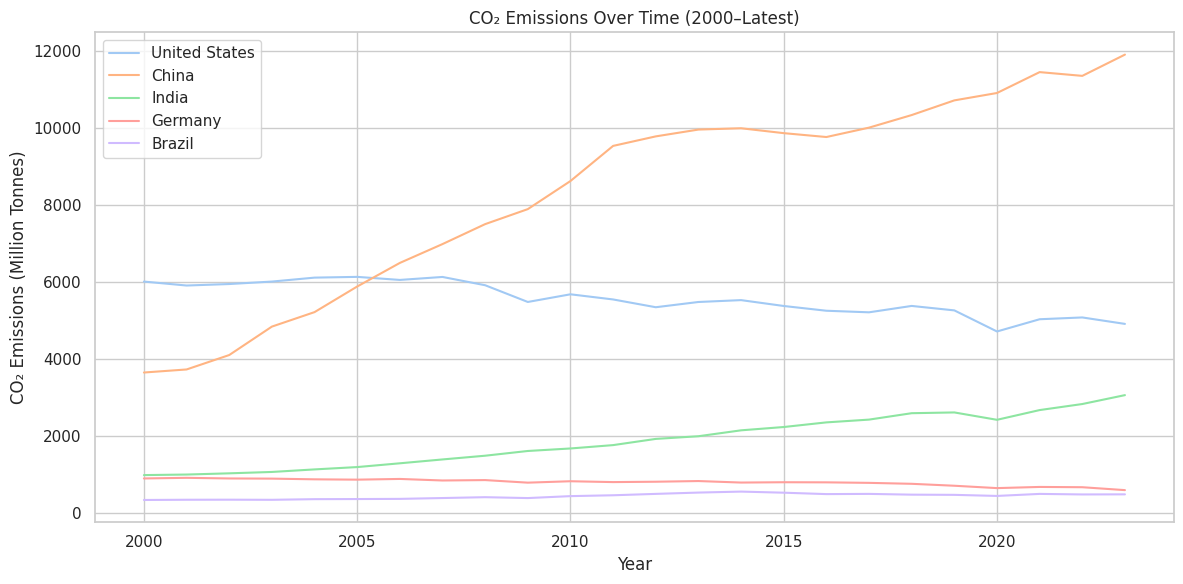

In [39]:
# Line plot of total CO₂ emissions over time by country
plt.figure(figsize=(12, 6))
for country in selected_countries:
    country_data = df[df["country"] == country]
    plt.plot(country_data["year"], country_data["co2"], label=country)

plt.title("CO₂ Emissions Over Time (2000–Latest)")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (Million Tonnes)")
plt.legend()
plt.tight_layout()
plt.show()

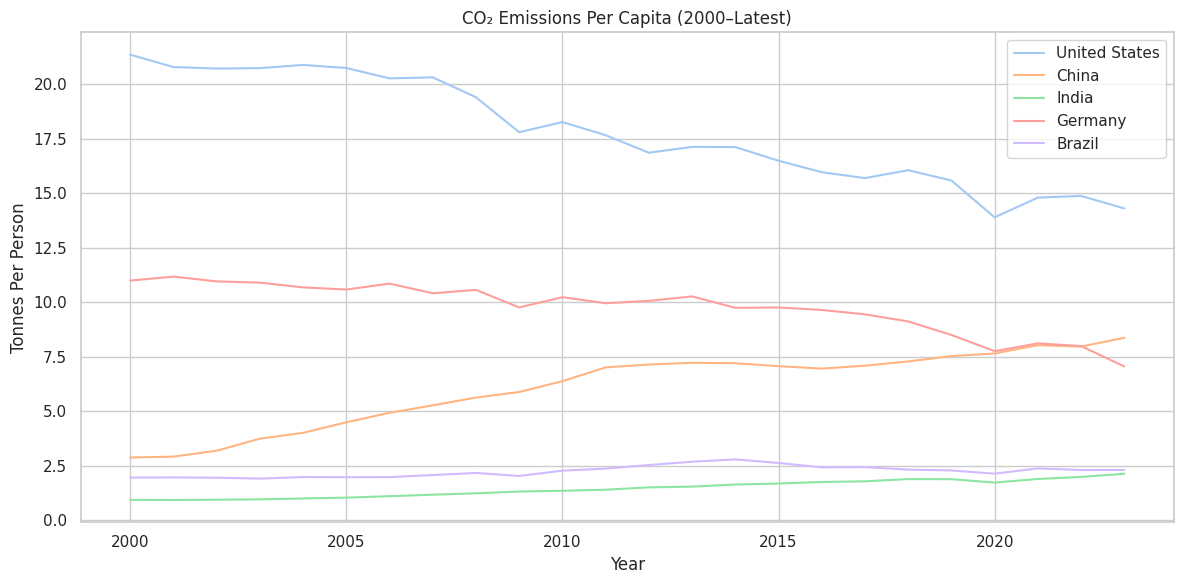

In [40]:
# Line plot of CO₂ per capita over time
plt.figure(figsize=(12, 6))
for country in selected_countries:
    country_data = df[df["country"] == country]
    plt.plot(country_data["year"], country_data["co2_per_capita"], label=country)

plt.title("CO₂ Emissions Per Capita (2000–Latest)")
plt.xlabel("Year")
plt.ylabel("Tonnes Per Person")
plt.legend()
plt.tight_layout()
plt.show()

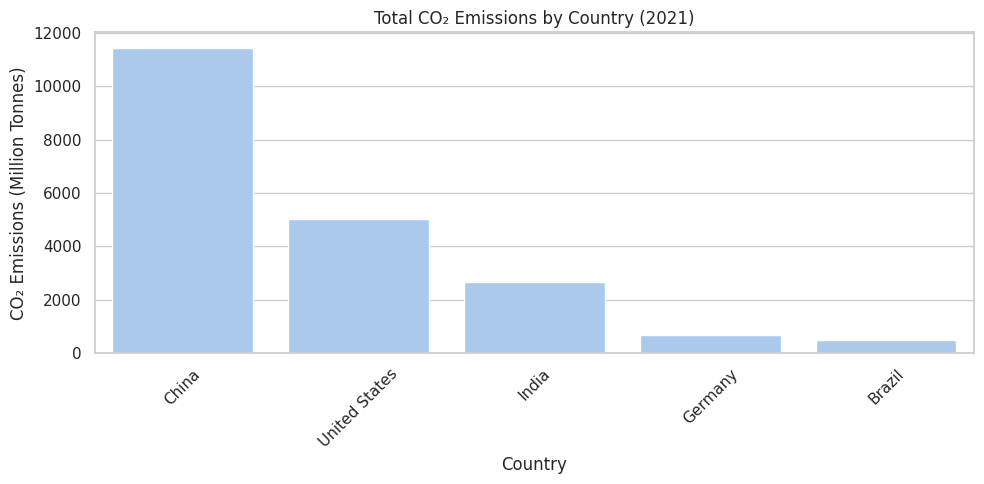

In [43]:
# Filter for the year 2021
df_2021 = df[df["year"] == 2021]

# Sort by CO₂ emissions
df_2021_sorted = df_2021.sort_values(by="co2", ascending=False)

# Bar plot of total CO₂ emissions in 2021
plt.figure(figsize=(10, 5))
sns.barplot(data=df_2021_sorted, x="country", y="co2")
plt.title("Total CO₂ Emissions by Country (2021)")
plt.xlabel("Country")
plt.ylabel("CO₂ Emissions (Million Tonnes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

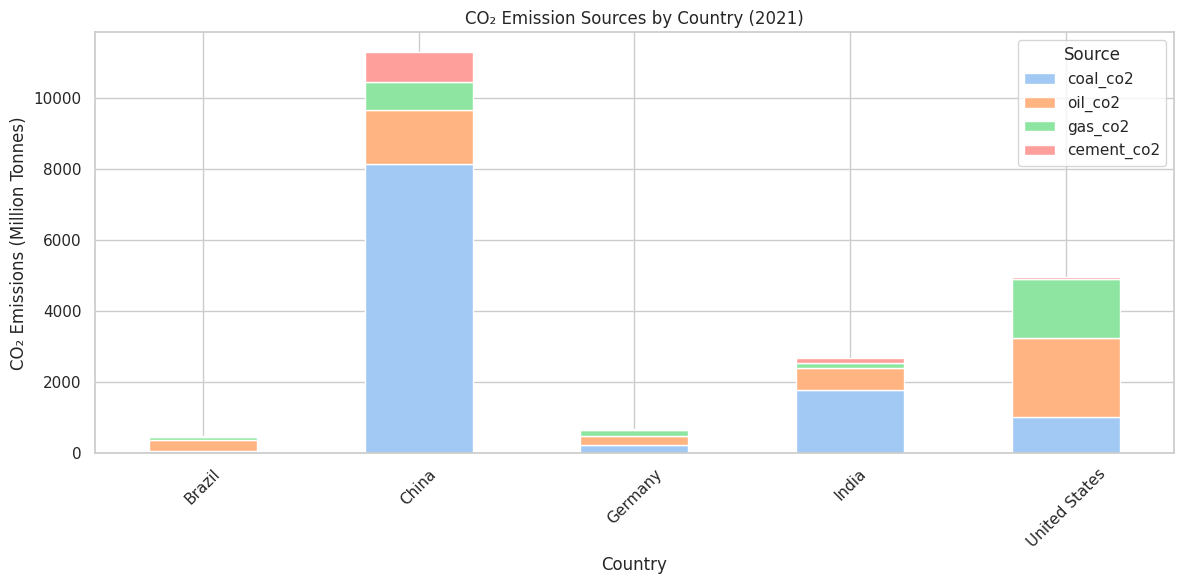

In [44]:
# Stack emission sources: coal, oil, gas, cement
emission_sources = ["coal_co2", "oil_co2", "gas_co2", "cement_co2"]

# Prepare data
stack_df = df_2021[["country"] + emission_sources].set_index("country")

# Plot
stack_df.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("CO₂ Emission Sources by Country (2021)")
plt.xlabel("Country")
plt.ylabel("CO₂ Emissions (Million Tonnes)")
plt.xticks(rotation=45)
plt.legend(title="Source")
plt.tight_layout()
plt.show()